In [139]:
import pandas as pd
from darts import TimeSeries as ts
from numpy import *
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)
import plotly.offline
import cufflinks as cf # requires pip install cufflinks
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [279]:
# Read the data into pandas DataFrames
may = pd.read_csv("MeasurementMay2022.csv", delimiter=",",parse_dates=[['data_date', 'data_time']] )
june = pd.read_csv("Measurementjune2022.csv", delimiter=",",parse_dates=[['data_date', 'data_time']] )
july = pd.read_csv("MeasurementsJuly2022.csv", delimiter=",",parse_dates=[['data_date', 'data_time']] )
aug = pd.read_csv("MeasurementAugust2022.csv", delimiter=",",parse_dates=[['data_date', 'data_time']] )

In [97]:
may.tail()

,data_date_data_time,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,...,Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
4592,2022-01-06 23:18:00,77.4,1.2,5.7,995.0,97.4,5.3,13.136,267.4,1703.4,...,9950,974,53,1,309,8.861084,0.167046,0.267443,206.28,0.75
4593,2022-01-06 23:28:00,205.8,0.3,5.8,994.9,98.3,5.6,13.136,267.4,1703.5,...,9949,983,56,1,309,8.861084,0.167055,0.267393,206.28,0.75
4594,2022-01-06 23:38:00,60.3,0.4,6.0,994.9,97.9,5.7,13.136,267.6,1703.6,...,9949,979,57,1,309,8.861084,0.167066,0.267555,206.28,0.75
4595,2022-01-06 23:48:00,0.0,0.0,6.1,994.9,98.3,5.8,13.136,267.4,1703.7,...,9949,983,58,1,309,8.861084,0.167073,0.267393,206.28,0.75
4596,2022-01-06 23:58:00,98.0,0.4,6.4,994.9,97.0,6.0,13.136,267.6,1703.8,...,9949,970,60,1,309,8.861084,0.167083,0.267555,206.28,0.75


In [280]:
#concat the data joining them by colunn names
df= pd.concat([may, june, july, aug], axis = 0)


In [281]:
#view the head
df.head()

,data_date_data_time,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,...,Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
0,2022-01-05 00:02:00,226.5,3.7,8.4,996.1,94.3,7.5,13.089,422.8,1754.6,...,9961,943,75,6,44,8.589600,0.172068,0.422807,no-data,no-data
1,2022-01-05 00:12:00,225.6,2.4,8.3,996.1,95.5,7.6,13.089,422.9,1754.5,...,9961,955,76,1,45,8.593872,0.172055,0.422906,no-data,no-data
2,2022-01-05 00:22:00,241.1,2.9,8.3,996.0,95.0,7.6,13.089,422.8,1754.5,...,9960,950,76,1,45,8.589600,0.172055,0.422807,no-data,no-data
3,2022-01-05 00:32:00,238.3,2.5,8.3,995.9,95.3,7.6,13.089,422.9,1754.7,...,9959,953,76,1,45,8.593872,0.172073,0.422906,no-data,no-data
4,2022-01-05 00:42:00,224.9,3.2,8.3,995.8,95.5,7.6,13.089,422.8,1754.7,...,9958,955,76,1,45,8.593872,0.172073,0.422807,no-data,no-data


In [111]:
df.tail()

,data_date_data_time,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,...,Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
4567,2022-01-09 23:18:00,83.5,0.7,11.5,996.4,95.7,10.9,13.115,299.1,1460.2,...,9964,957,109,0,1006,10.488342,0.143201,0.299075,206.04,0.99
4568,2022-01-09 23:28:00,62.5,0.9,11.7,996.3,95.4,11.0,13.115,299.2,1460.1,...,9963,954,110,0,1006,10.488342,0.143191,0.299199,206.04,0.99
4569,2022-01-09 23:38:00,96.0,1.1,11.7,996.2,95.3,11.0,13.115,299.3,1460.2,...,9962,953,110,0,1006,10.488342,0.143194,0.299323,206.04,0.99
4570,2022-01-09 23:48:00,79.8,1.2,11.7,996.1,95.2,11.0,13.115,299.2,1460.1,...,9961,952,110,0,1006,10.488342,0.143187,0.299199,206.04,0.99
4571,2022-01-09 23:58:00,94.9,1.3,11.8,996.0,94.9,11.0,13.103,299.2,1460.1,...,9960,949,110,0,1006,10.488342,0.143183,0.299199,206.04,0.99


In [282]:
#rename columns with protacted name strings as well as the time and date column
df= df.rename(columns= {"data_date_data_time":"datetime",
                       "Magna_6 Segment 1_ (10-30cm) Soil Moisture_%":"segment1(10-30cm)",
                       "Magna_6 Segment 2_ (40-60 cm) Soil Moisture_%":"segment2(40-60cm)",
                       "Magna_6 Segment 3_ (70-90 cm) Soil Moisture_%":"segment3(70-90cm)",
                       "Magna_6 Segment 1_ (10-30 cm) Soil Electrical Conductivity_S/m":"segment1(EC)",
                       "Magna_6 Segment 2_ (40-60 cm) Soil Electrical Conductivity__S/m":"segment2(EC)",
                        "Magna_6 Segment 3_ (70-90 cm) Soil Electrical Conductivity__S/m":"segment3(EC)"
                       })
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18091 entries, 0 to 4571
Data columns (total 35 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   datetime                                 18091 non-null  datetime64[ns]
 1   Magna_6 Wind Direction                   18091 non-null  float64       
 2   Magna_6 Wind Speed (m/s)                 18091 non-null  float64       
 3   Magna_6 Meteo Ambient Temperature (C)    18091 non-null  float64       
 4   Magna_6 Meteo Air Pressure (hpa)         18091 non-null  float64       
 5   Magna_6 Meteo Relative Humidity          18091 non-null  float64       
 6   Magna_6 Meteo Dew Point Temperature (C)  18091 non-null  float64       
 7   Power Supply (V)                         18091 non-null  float64       
 8   Magna_6 Water EC muS/cm                  18091 non-null  float64       
 9   Magna_6 Water Level Above Sensor mm     

In [284]:
df= df.set_index("datetime")

In [285]:
df.head()

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
datetime,,,,,,,,,,,,,,,,,,,,,
2022-01-05 00:02:00,226.5,3.7,8.4,996.1,94.3,7.5,13.089,422.8,1754.6,92.72,...,9961,943,75,6,44,8.589600,0.172068,0.422807,no-data,no-data
2022-01-05 00:12:00,225.6,2.4,8.3,996.1,95.5,7.6,13.089,422.9,1754.5,94.61,...,9961,955,76,1,45,8.593872,0.172055,0.422906,no-data,no-data
2022-01-05 00:22:00,241.1,2.9,8.3,996.0,95.0,7.6,13.089,422.8,1754.5,94.57,...,9960,950,76,1,45,8.589600,0.172055,0.422807,no-data,no-data
2022-01-05 00:32:00,238.3,2.5,8.3,995.9,95.3,7.6,13.089,422.9,1754.7,95.82,...,9959,953,76,1,45,8.593872,0.172073,0.422906,no-data,no-data
2022-01-05 00:42:00,224.9,3.2,8.3,995.8,95.5,7.6,13.089,422.8,1754.7,97.30,...,9958,955,76,1,45,8.593872,0.172073,0.422807,no-data,no-data


In [298]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16609 entries, 2022-11-05 08:02:00 to 2022-01-09 23:58:00
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   16609 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 16609 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    16609 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         16609 non-null  float64
 4   Magna_6 Meteo Relative Humidity          16609 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  16609 non-null  float64
 6   Power Supply (V)                         16609 non-null  float64
 7   Magna_6 Water EC muS/cm                  16609 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      16609 non-null  float64
 9   segment1(10-30cm)                        16609 non-null  float64
 10  segment1(EC

In [286]:
df.describe()

,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(10-30cm),...,Wind Direction (x10),Temperature (x10),Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS
count,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,...,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000,18091.000000
mean,210.545984,2.301946,13.493129,991.924974,81.214366,10.105539,13.461003,279.058023,1469.476557,70.266760,...,2105.459842,134.931292,9919.249737,812.143663,101.055387,4.218451,505.411752,9.384918,0.144106,0.279058
std,87.415214,1.509472,4.011261,7.129824,12.811278,2.767687,0.372192,56.750305,285.274045,15.483811,...,874.152138,40.112615,71.298242,128.112783,27.676867,9.238342,276.373191,0.581186,0.027976,0.056751
min,0.000000,0.000000,2.900000,973.200000,29.900000,2.000000,12.948000,0.000000,1.000000,0.000000,...,0.000000,29.000000,9732.000000,299.000000,20.000000,0.000000,44.000000,8.589600,0.000094,0.000000
25%,112.300000,1.100000,10.800000,986.900000,72.700000,8.200000,13.133000,276.100000,1378.900000,59.800000,...,1123.000000,108.000000,9869.000000,727.000000,82.000000,0.000000,308.000000,8.848389,0.135222,0.276119
50%,248.300000,2.000000,13.100000,992.500000,83.700000,10.000000,13.565000,293.100000,1492.000000,70.100000,...,2483.000000,131.000000,9925.000000,837.000000,100.000000,0.000000,498.000000,9.305420,0.146312,0.293098
75%,276.500000,3.100000,15.800000,997.050000,91.500000,12.000000,13.583000,297.200000,1667.050000,71.970000,...,2765.000000,158.000000,9970.500000,915.000000,120.000000,4.000000,717.000000,9.874817,0.163481,0.297167
max,359.700000,12.400000,34.500000,1007.600000,100.000000,20.200000,14.340000,441.000000,1763.800000,100.000000,...,3597.000000,345.000000,10076.000000,1000.000000,202.000000,94.000000,1006.000000,11.520813,0.172971,0.440954


Preprocessing
--

In [287]:
df['Metres above MSL'] = pd.to_numeric(df['Metres above MSL'], errors='coerce')
df['TOW _MH2O'] = pd.to_numeric(df['TOW _MH2O'], errors='coerce')


<AxesSubplot:ylabel='datetime'>

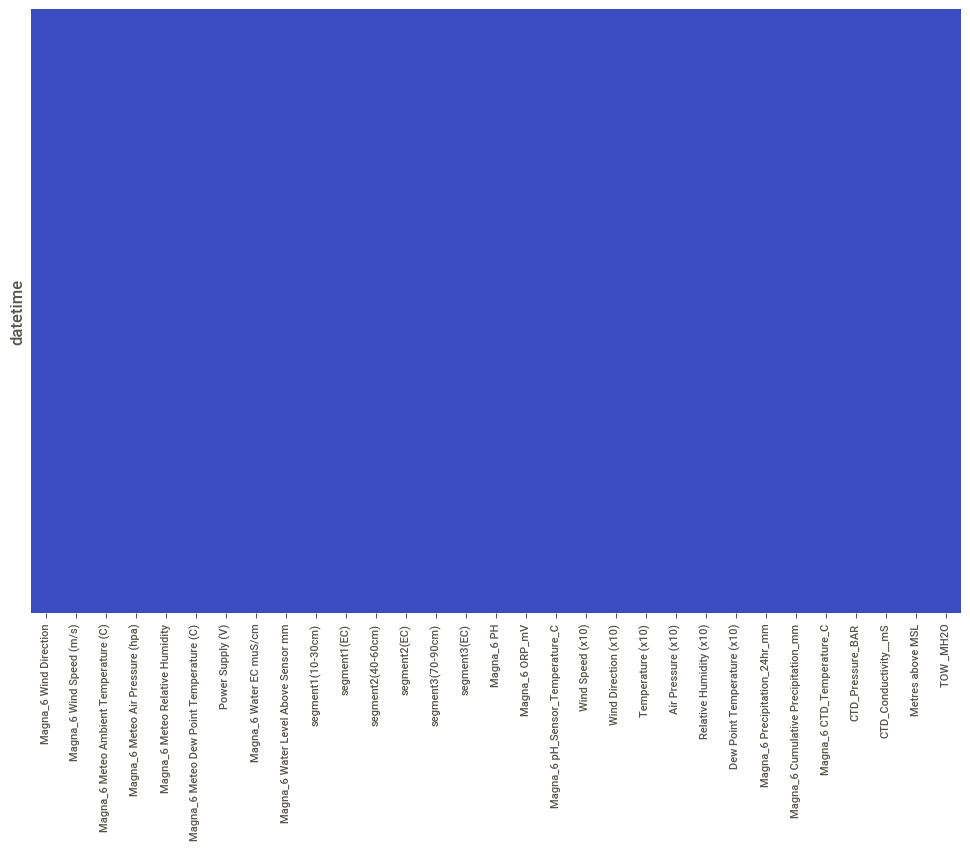

In [299]:
#CHECK FOR NULL VALUES
plt.figure(figsize= (12,8))
sns.heatmap(df.isnull(), yticklabels =False, cbar= False, cmap= "coolwarm")

In [289]:
#DROP ALL ROWS WITH NULL VALUES since the reaings are right at the start
df.dropna(inplace = True)

<AxesSubplot:ylabel='datetime'>

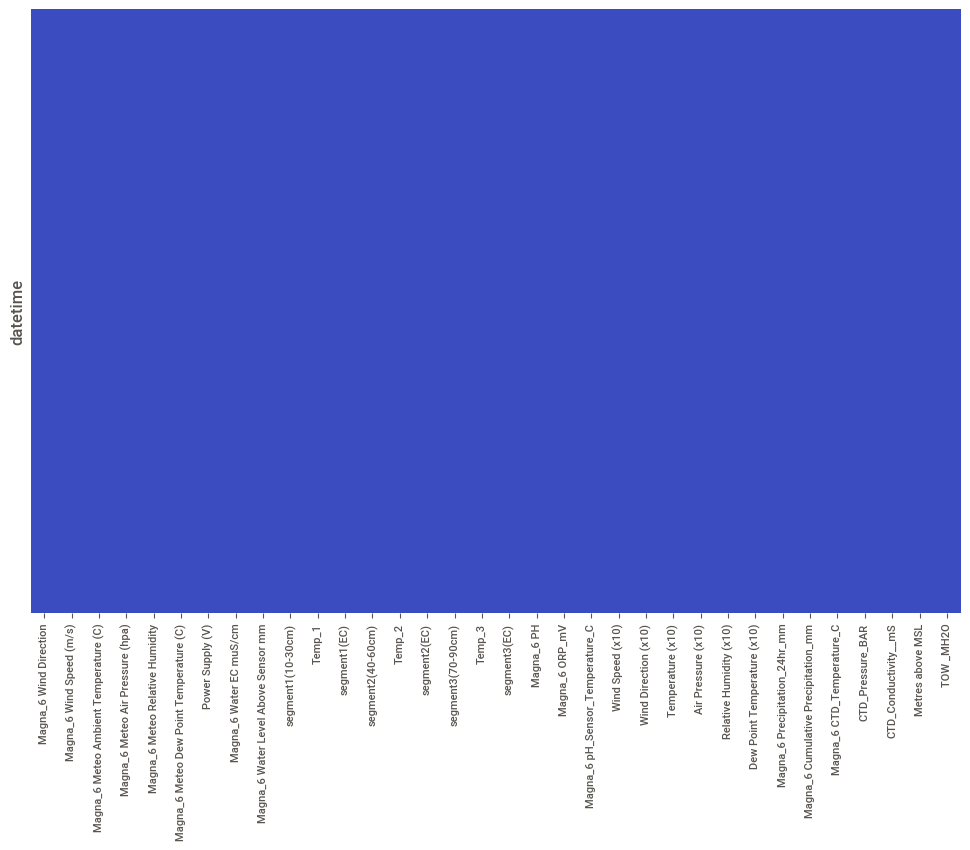

In [290]:
#CHECK FOR NULL VALUES second try
#this shows that our dataset is clean
plt.figure(figsize= (12,8))
sns.heatmap(df.isnull(), yticklabels =False, cbar= False, cmap= "coolwarm")

EDA
--

In [295]:
#perform basic eda
import sweetviz
eda =sw.analyze(df)


                                             |          | [  0%]   00:00 -> (? left)

In [296]:
eda.show_html("output.html", open_browser=True)

Report output.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [300]:
#THE EDA show that the Temp COLUMNS CAN NOW BE REMOVED AS THEY OFFER NO VARIABILITY
df.drop(['Temp_1', 'Temp_2', 'Temp_3'], axis = 1, inplace = True)

KeyError: "['Temp_1', 'Temp_2', 'Temp_3'] not found in axis"

In [301]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16609 entries, 2022-11-05 08:02:00 to 2022-01-09 23:58:00
Data columns (total 31 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   16609 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 16609 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    16609 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         16609 non-null  float64
 4   Magna_6 Meteo Relative Humidity          16609 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  16609 non-null  float64
 6   Power Supply (V)                         16609 non-null  float64
 7   Magna_6 Water EC muS/cm                  16609 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      16609 non-null  float64
 9   segment1(10-30cm)                        16609 non-null  float64
 10  segment1(EC

TS
--

In [307]:
df["ts"] =df.iloc[:,9]

In [310]:
df["ts"]

datetime
2022-11-05 08:02:00    100.00
2022-11-05 08:12:00    100.00
2022-11-05 08:22:00    100.00
2022-11-05 08:32:00    100.00
2022-11-05 08:42:00    100.00
                        ...  
2022-01-09 23:18:00     59.56
2022-01-09 23:28:00     59.56
2022-01-09 23:38:00     59.58
2022-01-09 23:48:00     59.60
2022-01-09 23:58:00     59.59
Name: ts, Length: 16609, dtype: float64

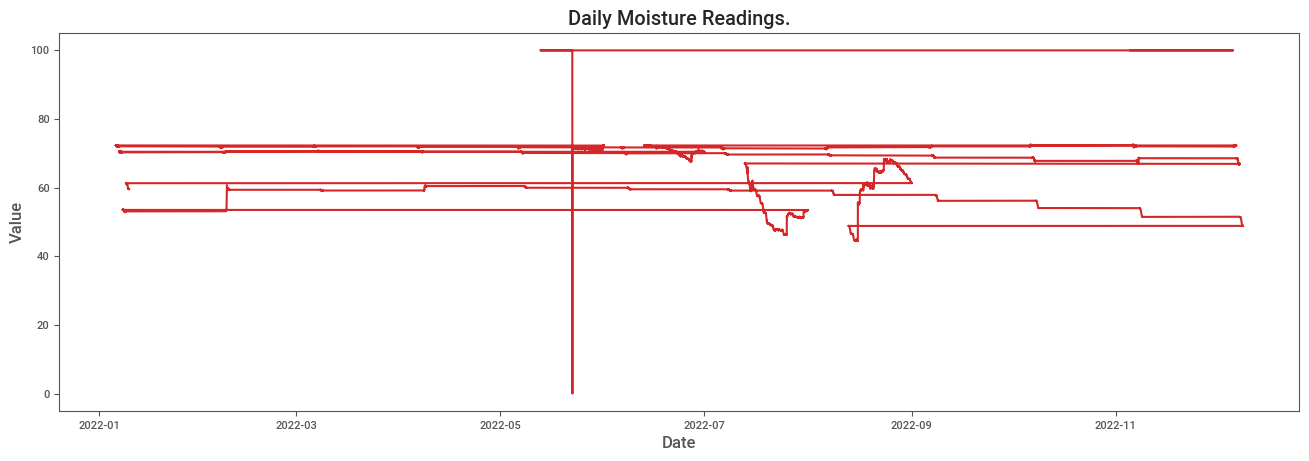

In [302]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df["segment1(10-30cm)"],
        title='Daily Moisture Readings.')    

Feature Selection
--

In [262]:
#create. a dataframe to test to multicollinearity.
dfx=df.drop(columns=["datetime","segment2(40-60cm)","segment3(70-90cm)","segment2(EC)","segment3(EC)"])

In [263]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dfx, test_size=0.2)

In [264]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13287 entries, 2710 to 2550
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Magna_6 Wind Direction                   13287 non-null  float64
 1   Magna_6 Wind Speed (m/s)                 13287 non-null  float64
 2   Magna_6 Meteo Ambient Temperature (C)    13287 non-null  float64
 3   Magna_6 Meteo Air Pressure (hpa)         13287 non-null  float64
 4   Magna_6 Meteo Relative Humidity          13287 non-null  float64
 5   Magna_6 Meteo Dew Point Temperature (C)  13287 non-null  float64
 6   Power Supply (V)                         13287 non-null  float64
 7   Magna_6 Water EC muS/cm                  13287 non-null  float64
 8   Magna_6 Water Level Above Sensor mm      13287 non-null  float64
 9   segment1(10-30cm)                        13287 non-null  float64
 10  segment1(EC)                             132

In [265]:
array = train.values
print(array)

[[2.75400e+02 6.00000e-01 2.30000e+01 ... 2.93328e-01 2.05990e+02
  1.04000e+00]
 [2.65600e+02 4.90000e+00 1.51000e+01 ... 2.96630e-01 2.05950e+02
  1.07000e+00]
 [3.46200e+02 3.40000e+00 1.67000e+01 ... 2.85320e-01 2.06200e+02
  8.20000e-01]
 ...
 [6.83000e+01 1.80000e+00 1.79000e+01 ... 2.92929e-01 2.05980e+02
  1.05000e+00]
 [2.53400e+02 1.50000e+00 1.27000e+01 ... 2.93304e-01 2.06020e+02
  1.01000e+00]
 [2.78200e+02 3.30000e+00 1.57000e+01 ... 2.98279e-01 2.06040e+02
  9.90000e-01]]


In [266]:

X = delete(array,10,1)  #independent columns
y = array[:, 10]    #target column 

In [267]:
X.shape


(13287, 26)

In [268]:
y.shape

(13287,)

In [269]:
X

array([[2.75400e+02, 6.00000e-01, 2.30000e+01, ..., 2.93328e-01,
        2.05990e+02, 1.04000e+00],
       [2.65600e+02, 4.90000e+00, 1.51000e+01, ..., 2.96630e-01,
        2.05950e+02, 1.07000e+00],
       [3.46200e+02, 3.40000e+00, 1.67000e+01, ..., 2.85320e-01,
        2.06200e+02, 8.20000e-01],
       ...,
       [6.83000e+01, 1.80000e+00, 1.79000e+01, ..., 2.92929e-01,
        2.05980e+02, 1.05000e+00],
       [2.53400e+02, 1.50000e+00, 1.27000e+01, ..., 2.93304e-01,
        2.06020e+02, 1.01000e+00],
       [2.78200e+02, 3.30000e+00, 1.57000e+01, ..., 2.98279e-01,
        2.06040e+02, 9.90000e-01]])

In [270]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [271]:
# Feature extraction
test2 = SelectKBest(score_func=chi2, k=4)
mode = test2.fit(X, y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

ValueError: Input X must be non-negative.

In [202]:
X


,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,segment1(EC),...,Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
1482,269.8,4.0,10.6,976.5,83.6,7.9,14.337,154.4,744.1,3.07,...,9765,836,79,4,114,8.644775,0.072969,0.154396,205.32,1.71
1483,264.9,3.7,10.1,976.6,84.5,7.6,14.337,154.3,745.7,3.07,...,9766,845,76,4,114,8.644775,0.073128,0.154262,205.32,1.71
1484,257.7,3.9,9.9,976.8,84.4,7.4,14.337,154.1,746.5,3.08,...,9768,844,74,4,114,8.644775,0.073202,0.154092,205.32,1.71
1485,273.5,3.6,9.9,976.9,85.1,7.5,14.337,154.1,747.1,3.07,...,9769,851,75,4,114,8.644775,0.073261,0.154092,205.32,1.70
1486,254.3,4.2,10.2,977.0,85.0,7.8,14.337,154.2,748.2,3.08,...,9770,850,78,4,114,8.644775,0.073374,0.154226,205.32,1.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4567,83.5,0.7,11.5,996.4,95.7,10.9,13.115,299.1,1460.2,2.08,...,9964,957,109,0,1006,10.488342,0.143201,0.299075,206.04,0.99
4568,62.5,0.9,11.7,996.3,95.4,11.0,13.115,299.2,1460.1,2.08,...,9963,954,110,0,1006,10.488342,0.143191,0.299199,206.04,0.99
4569,96.0,1.1,11.7,996.2,95.3,11.0,13.115,299.3,1460.2,2.08,...,9962,953,110,0,1006,10.488342,0.143194,0.299323,206.04,0.99
4570,79.8,1.2,11.7,996.1,95.2,11.0,13.115,299.2,1460.1,2.08,...,9961,952,110,0,1006,10.488342,0.143187,0.299199,206.04,0.99


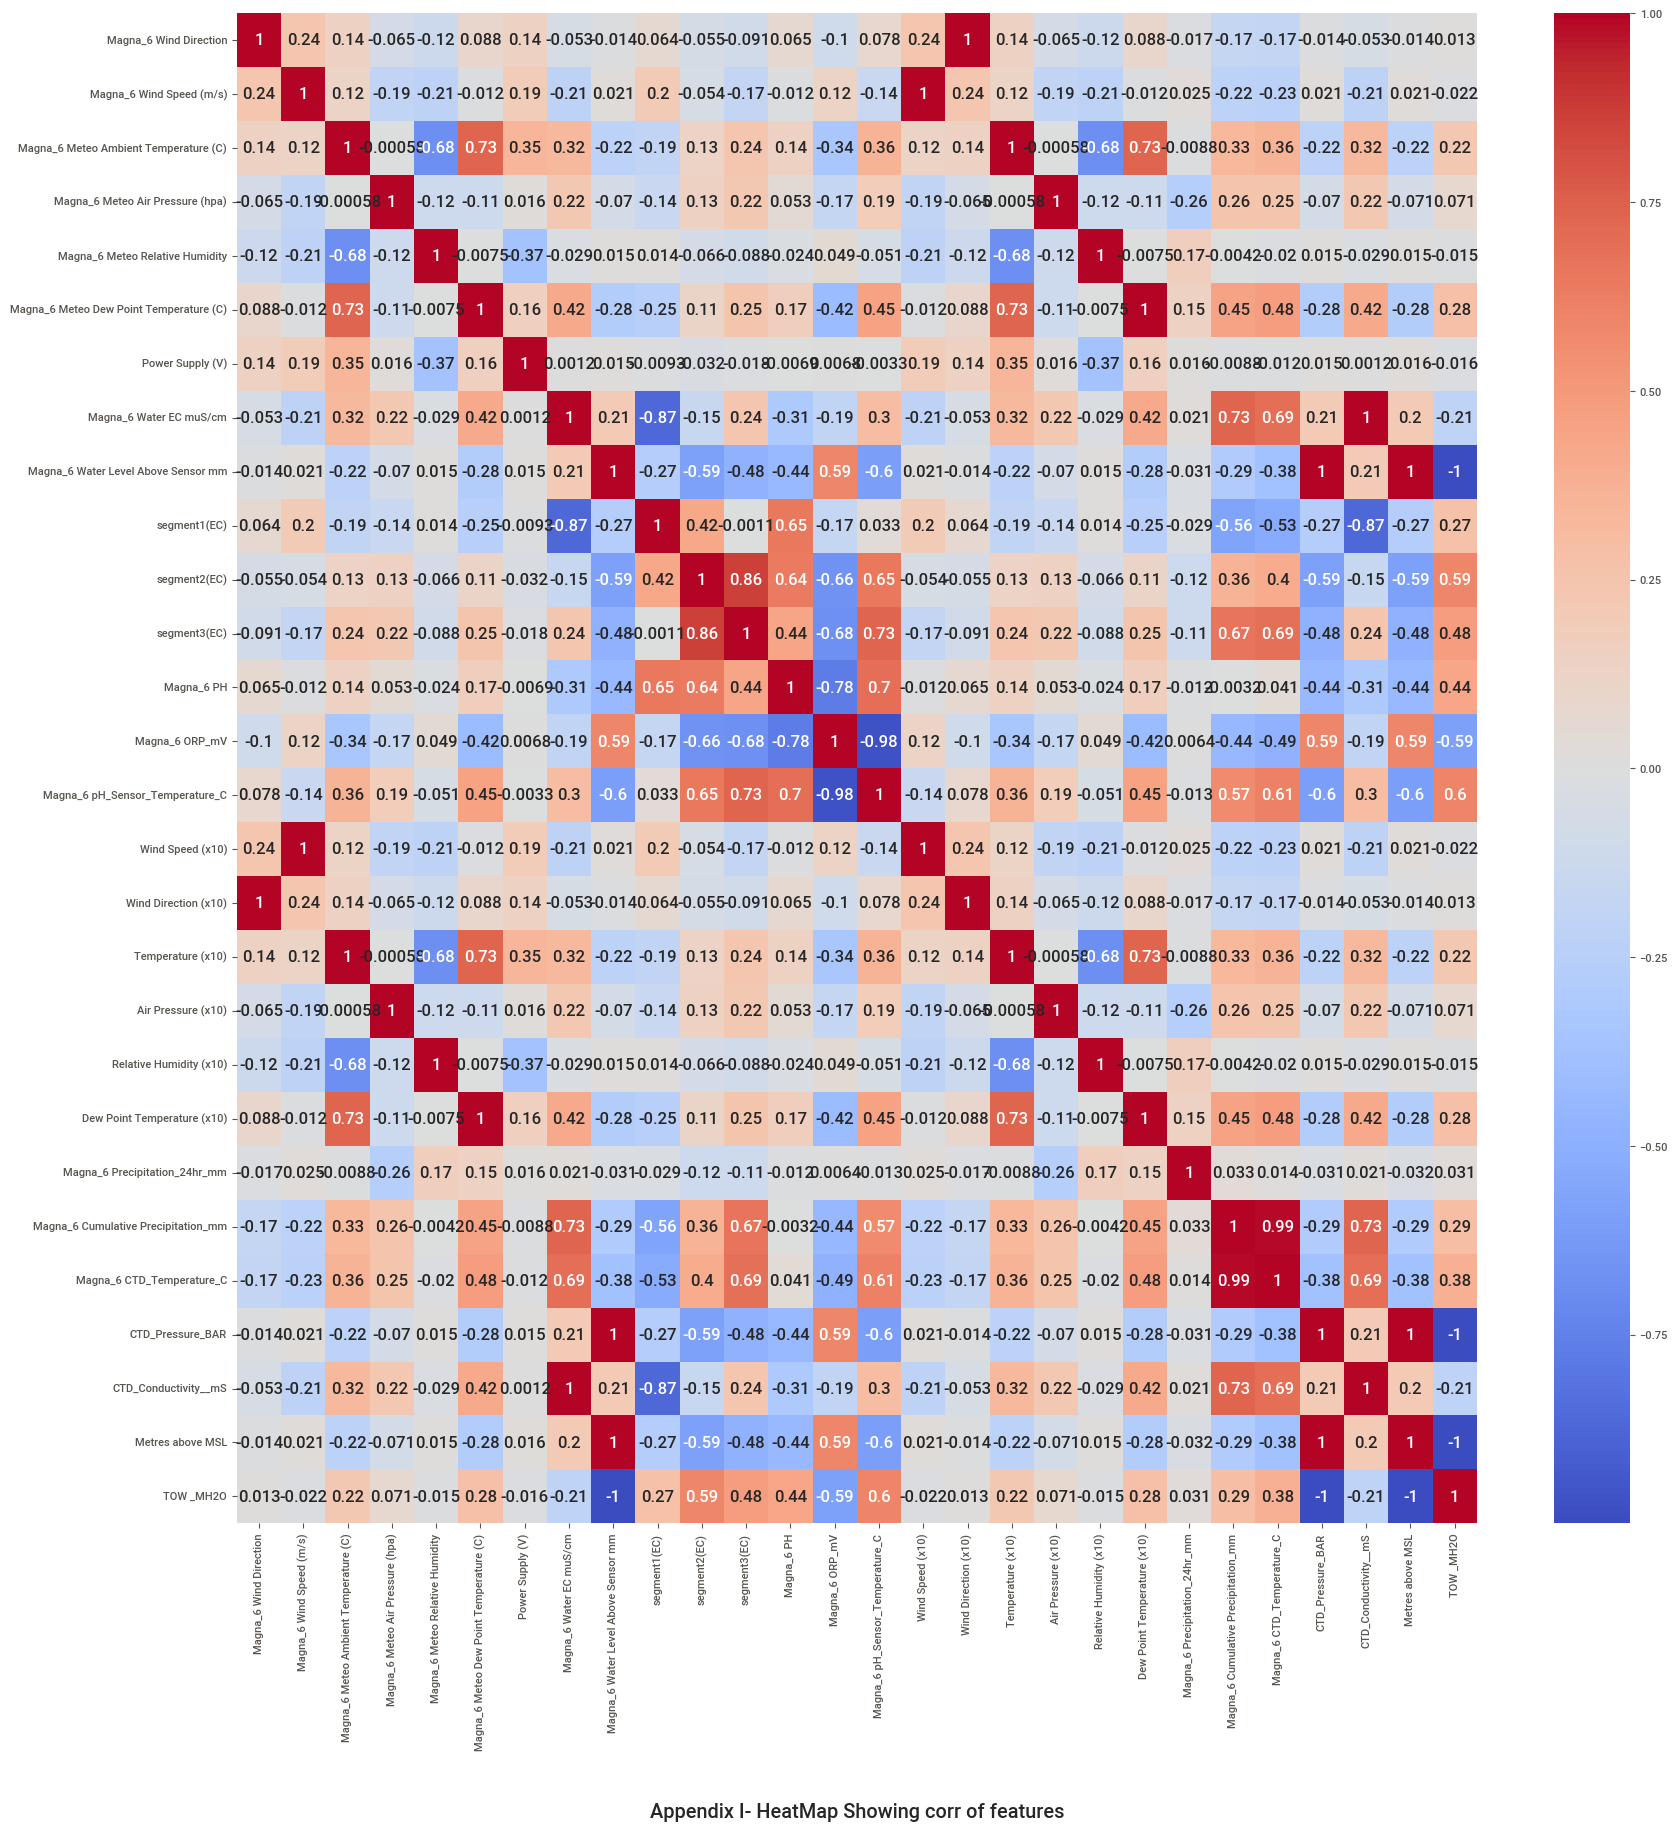

In [136]:
#Pairwise association of the dependent variables
# to establish the presence of multicollinearity.
fig = plt.figure(figsize=(20, 20))
sns.heatmap(dfx.corr(), cmap= "coolwarm", annot = True)
plt.title("Appendix I- HeatMap Showing corr of features",y=-0.2)
#Heatmap shows a high correlation between survival and timerecurrence so we drop one of
plt.savefig("Appendix 1.png")

,datetime,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,...,Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
3012,2022-07-21 22:08:00,79.5,3.2,13.1,999.3,83.2,10.3,13.171,293.0,1397.6,...,9993,832,103,0,580,9.672607,0.137055,0.293032,205.97,1.05
2520,2022-08-18 16:08:00,237.6,3.4,18.1,983.1,78.4,14.3,13.573,298.3,1460.4,...,9831,784,143,0,903,10.232361,0.143214,0.298279,206.04,0.99
4287,2022-08-31 00:38:00,109.7,0.5,8.7,1004.8,92.7,7.6,13.107,299.3,1475.2,...,10048,927,76,0,1006,10.454773,0.144671,0.299340,206.05,0.98
3361,2022-05-24 09:12:00,300.2,2.0,11.8,977.1,79.6,8.4,14.011,245.6,1676.5,...,9771,796,84,0,208,8.755127,0.164406,0.245643,206.25,0.78
3334,2022-05-24 04:42:00,288.5,2.8,7.0,975.2,93.2,6.0,12.997,245.0,1674.2,...,9752,932,60,0,208,8.750854,0.164185,0.244998,206.25,0.78


In [83]:
test.head()

,datetime,Magna_6 Wind Direction,Magna_6 Wind Speed (m/s),Magna_6 Meteo Ambient Temperature (C),Magna_6 Meteo Air Pressure (hpa),Magna_6 Meteo Relative Humidity,Magna_6 Meteo Dew Point Temperature (C),Power Supply (V),Magna_6 Water EC muS/cm,Magna_6 Water Level Above Sensor mm,...,Air Pressure (x10),Relative Humidity (x10),Dew Point Temperature (x10),Magna_6 Precipitation_24hr_mm,Magna_6 Cumulative Precipitation_mm,Magna_6 CTD_Temperature_C,CTD_Pressure_BAR,CTD_Conductivity__mS,Metres above MSL,TOW _MH2O
268,2022-06-14 06:38:00,251.1,1.0,11.3,996.1,89.3,9.6,13.535,281.9,1697.7,...,9961,893,96,0,393,9.038940,0.166488,0.281947,206.27,0.75
452,2022-06-15 13:18:00,303.5,2.3,19.3,994.5,53.5,9.7,13.565,283.0,1676.6,...,9945,535,97,0,393,9.055847,0.164420,0.283048,206.25,0.78
1932,2022-06-25 19:58:00,215.9,2.0,14.5,979.6,67.0,8.4,13.581,289.3,1574.3,...,9796,670,84,2,420,9.208191,0.154384,0.289292,206.15,0.88
580,2022-06-16 10:38:00,315.6,3.2,19.1,996.8,65.5,12.5,13.571,283.3,1663.4,...,9968,655,125,0,393,9.064331,0.163120,0.283264,206.24,0.79
310,2022-06-14 13:38:00,262.9,2.3,15.7,995.9,63.9,8.9,13.579,282.5,1692.7,...,9959,639,89,0,393,9.038940,0.165999,0.282531,206.27,0.76


In [75]:
ts1= ts.from_dataframe(df, "datetime", "segment1(10-30cm)",
                       fill_missing_dates=True,
                       start='2022-12-06', end='2022-01-07',
                       2022-12-06)

TypeError: from_dataframe() got an unexpected keyword argument 'start'

In [55]:
ts1

<TimeSeries (DataArray) (datetime: 48096, component: 1, sample: 1)>
array([[[70.45]],

       [[70.43]],

       [[70.43]],

       ...,

       [[72.35]],

       [[72.28]],

       [[72.29]]])
Coordinates:
  * datetime   (datetime) datetime64[ns] 2022-01-07T00:08:00 ... 2022-12-06T2...
  * component  (component) object 'segment1(10-30cm)'
Dimensions without coordinates: sample
Attributes:
    static_covariates:  None
    hierarchy:          None

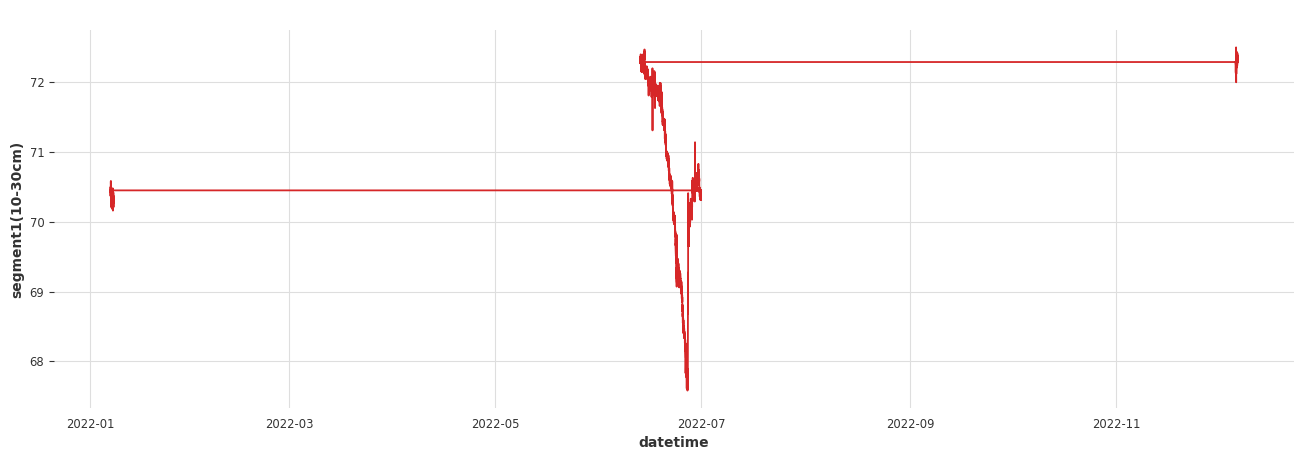

In [68]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='datetime', ylabel='segment1(10-30cm)', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.datetime, y=df["segment1(10-30cm)"], title=" ")

In [56]:
# Set aside the last 36 months as a validation series
train, val = ts1[:-36], ts1[-36:]

In [61]:
from darts.models import ExponentialSmoothing

OSError: dlopen(/Users/sage/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so, 0x0006): Library not loaded: '/usr/local/opt/libomp/lib/libomp.dylib'
  Referenced from: '/Users/sage/opt/anaconda3/lib/python3.9/site-packages/lightgbm/lib_lightgbm.so'
  Reason: tried: '/usr/local/opt/libomp/lib/libomp.dylib' (no such file), '/usr/local/lib/libomp.dylib' (no such file), '/usr/lib/libomp.dylib' (no such file)

In [ ]:
model = ExponentialSmoothing()
model.fit(train)
prediction = model.predict(len(val), num_samples=1000)

In [ ]:
ts1.plot()
prediction.plot(label="forecast",
                low_quantile=0.05,
                high_quantile=0.95)
plt.legend()